In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import plotly.express as px

In [6]:
df = pd.read_csv("/content/amazon_alexa.tsv",sep="\t")

In [7]:
df.head(5)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,3150.0,4.463175,1.068506,1.0,4.0,5.0,5.0,5.0
feedback,3150.0,0.918413,0.273778,0.0,1.0,1.0,1.0,1.0


In [10]:
df["feedback"].unique()

array([1, 0])

In [11]:
df["rating"].unique()

array([5, 4, 3, 2, 1])

In [12]:
df["variation"].unique()

array(['Charcoal Fabric ', 'Walnut Finish ', 'Heather Gray Fabric ',
       'Sandstone Fabric ', 'Oak Finish ', 'Black', 'White',
       'Black  Spot', 'White  Spot', 'Black  Show', 'White  Show',
       'Black  Plus', 'White  Plus', 'Configuration: Fire TV Stick',
       'Black  Dot', 'White  Dot'], dtype=object)

In [13]:
df.head(2)

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1


In [14]:
import seaborn as sns

<ipython-input-15-88ffc29a586f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_distribution.keys()),


<Axes: title={'center': 'Rating Distributions'}>

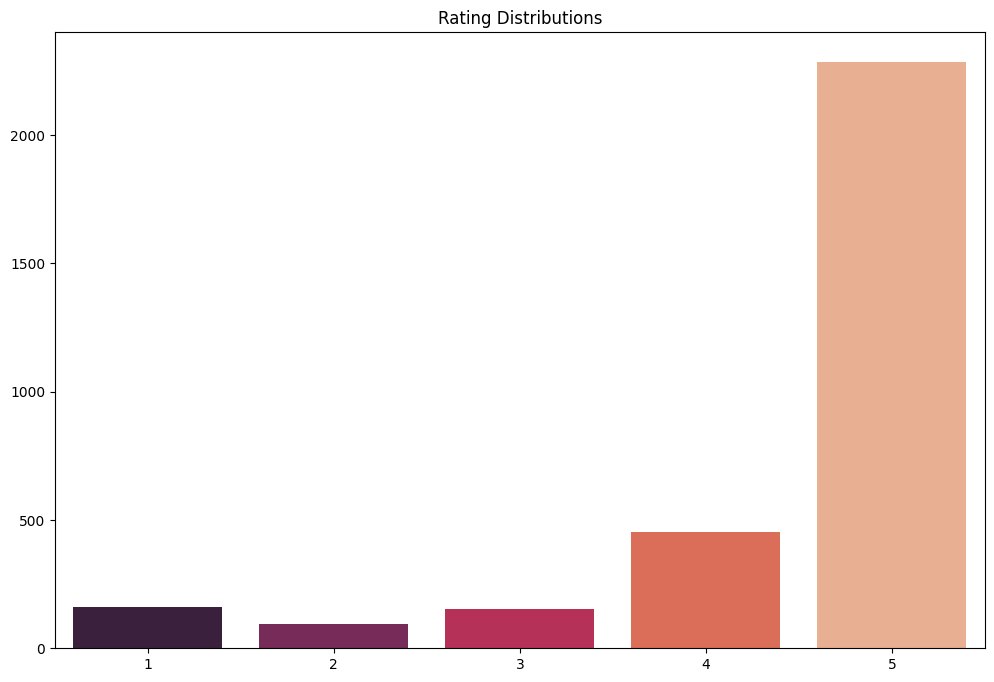

In [15]:
plt.figure(figsize=(12,8))
plt.title("Rating Distributions")
train_distribution = df['rating'].value_counts().sort_values()


sns.barplot(x=list(train_distribution.keys()),
            y=train_distribution.values,palette='rocket')

<ipython-input-16-95d530986a76>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_distribution.keys()),


<Axes: title={'center': 'Feedback'}>

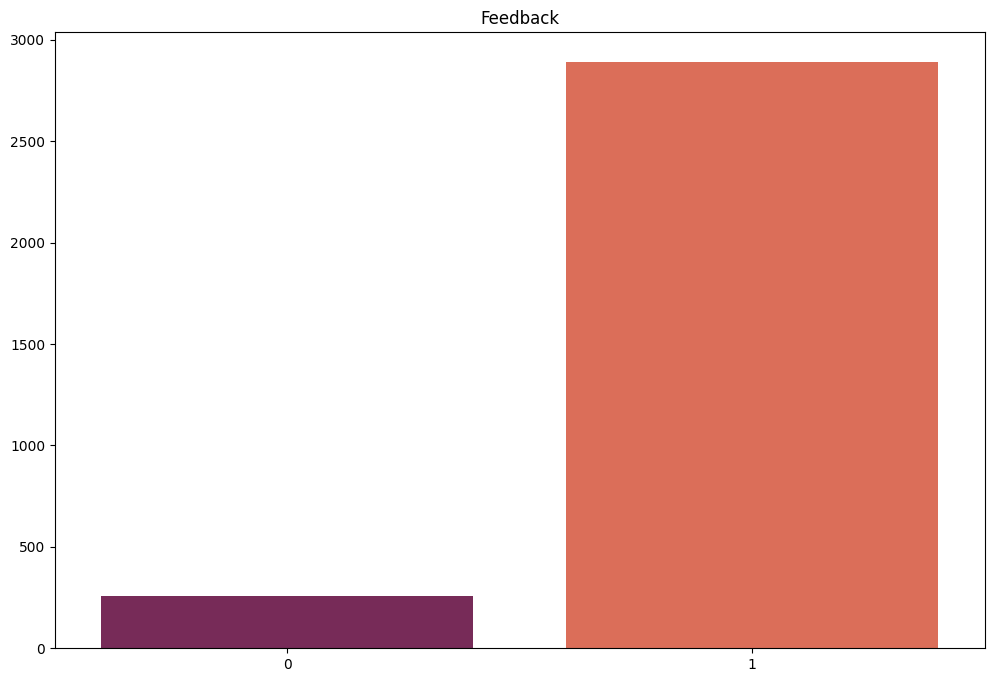

In [16]:
plt.figure(figsize=(12,8))
plt.title("Feedback")
train_distribution = df['feedback'].value_counts().sort_values()


sns.barplot(x=list(train_distribution.keys()),
            y=train_distribution.values,palette='rocket')

<ipython-input-17-1dc2dc971780>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(train_distribution.keys()),


<Axes: title={'center': 'Variation Distribution'}>

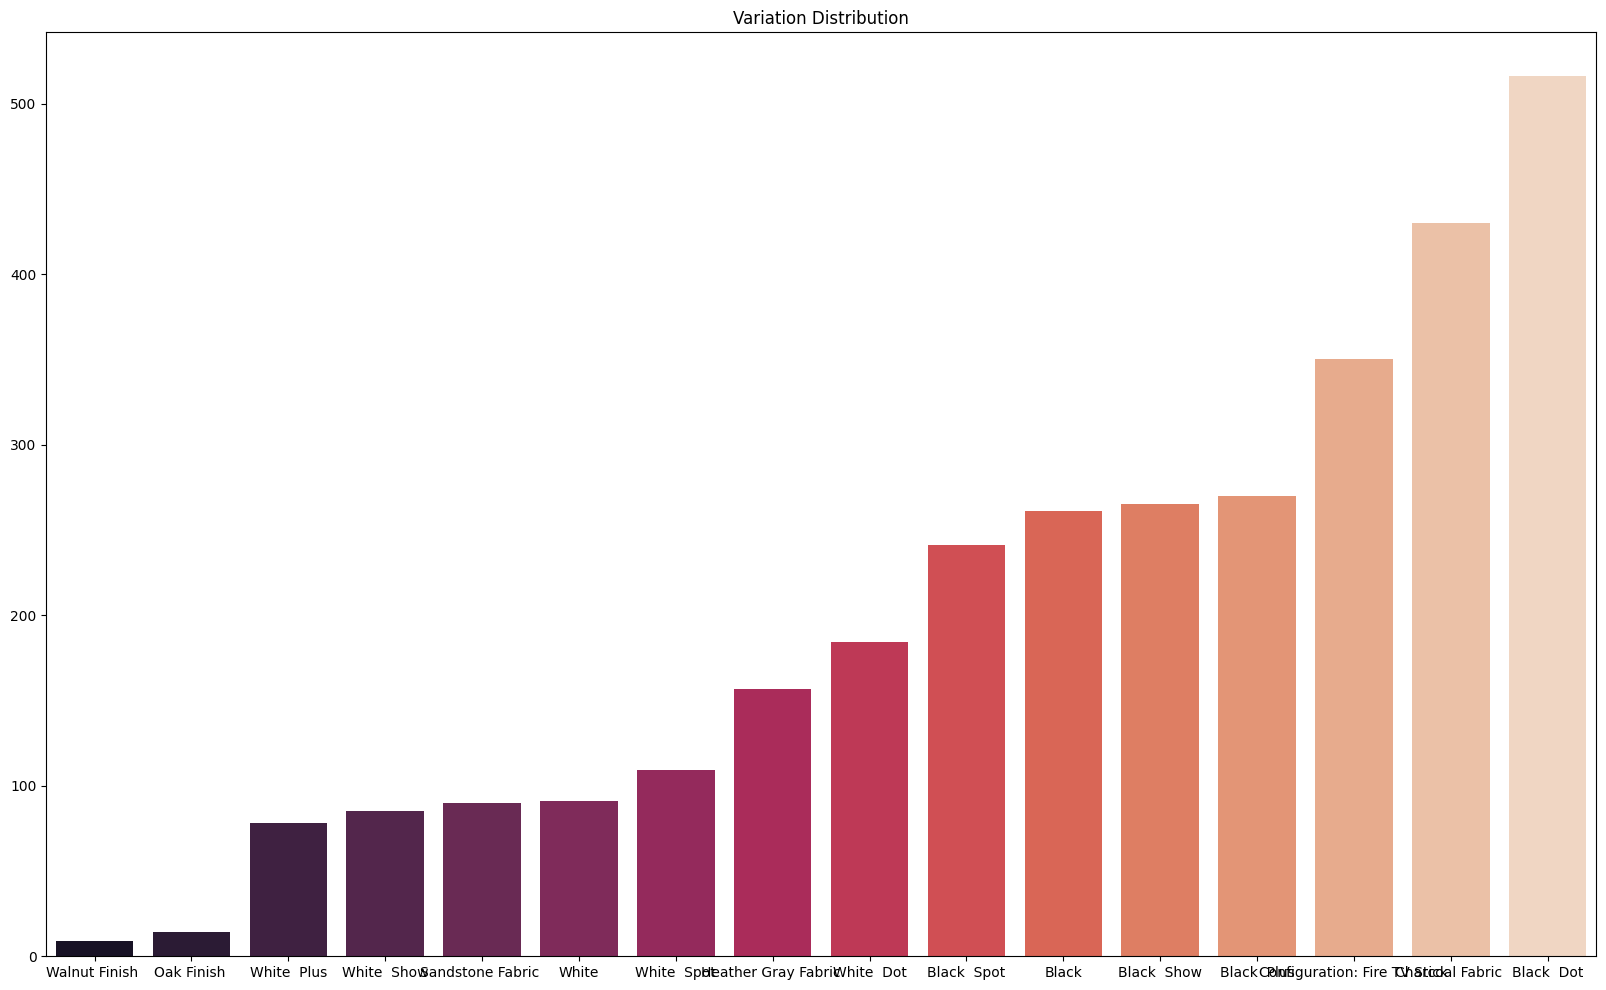

In [17]:
plt.figure(figsize=(20,12))
plt.title("Variation Distribution")
train_distribution = df['variation'].value_counts().sort_values()


sns.barplot(x=list(train_distribution.keys()),
            y=train_distribution.values,palette='rocket')

In [18]:

!pip install wordcloud

In [19]:
from wordcloud import WordCloud

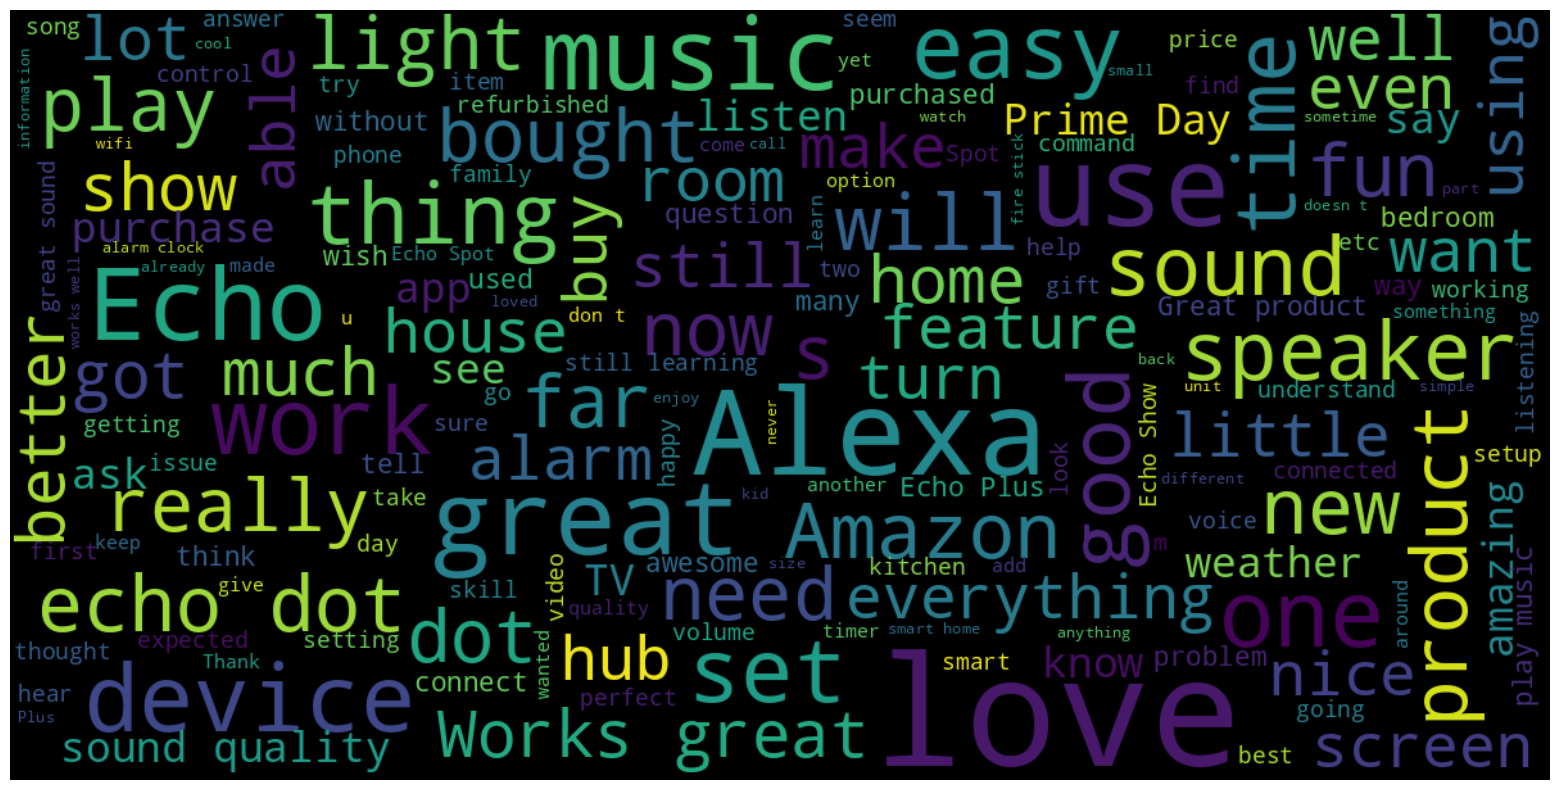

In [20]:
reviews = ' '.join(map(str, df['verified_reviews']))
wordcloud = WordCloud(
        background_color='black',

        max_words=200,
        max_font_size=40,
        scale=3,
        random_state=1
    )
wordcloud.generate(str(reviews))
plt.figure( figsize=(20,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()

In [21]:
review_text = df.drop(['rating','date','variation','feedback'],axis=1)
review_text

,verified_reviews
0,Love my Echo!
1,Loved it!
2,"Sometimes while playing a game, you can answer..."
3,I have had a lot of fun with this thing. My 4 ...
4,Music
...,...
3145,"Perfect for kids, adults and everyone in betwe..."
3146,"Listening to music, searching locations, check..."
3147,"I do love these things, i have them running my..."
3148,Only complaint I have is that the sound qualit...


In [22]:
df["review_lower"] = review_text.apply(lambda x: x.astype(str).str.lower())
df["review_lower"]

,review_lower
0,love my echo!
1,loved it!
2,"sometimes while playing a game, you can answer..."
3,i have had a lot of fun with this thing. my 4 ...
4,music
...,...
3145,"perfect for kids, adults and everyone in betwe..."
3146,"listening to music, searching locations, check..."
3147,"i do love these things, i have them running my..."
3148,only complaint i have is that the sound qualit...


In [23]:
import string

In [24]:
def remove_puntuations(text):
    no_puntuations ="".join([char for char in text if text if char not in string.punctuation])
    return no_puntuations
df["no_puntuation"] = df["review_lower"].apply(lambda x: remove_puntuations(x))
df["no_puntuation"]

,no_puntuation
0,love my echo
1,loved it
2,sometimes while playing a game you can answer ...
3,i have had a lot of fun with this thing my 4 y...
4,music
...,...
3145,perfect for kids adults and everyone in between
3146,listening to music searching locations checkin...
3147,i do love these things i have them running my ...
3148,only complaint i have is that the sound qualit...


In [25]:
def remove_emoji(string):
    import re
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

df['review_noemoji'] = df['no_puntuation'].apply(lambda x: remove_emoji(x))
df['review_noemoji']

,review_noemoji
0,love my echo
1,loved it
2,sometimes while playing a game you can answer ...
3,i have had a lot of fun with this thing my 4 y...
4,music
...,...
3145,perfect for kids adults and everyone in between
3146,listening to music searching locations checkin...
3147,i do love these things i have them running my ...
3148,only complaint i have is that the sound qualit...


In [26]:
import re

In [27]:
EMOTICONS=[':-<',':->']
def remove_emoticons(text):
    emoticon_pattern = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    return emoticon_pattern.sub(r'', text)

df["review_emoticons"]= df['review_noemoji'].apply(lambda x: remove_emoticons(x))
df["review_emoticons"]

,review_emoticons
0,love my echo
1,loved it
2,sometimes while playing a game you can answer ...
3,i have had a lot of fun with this thing my 4 y...
4,music
...,...
3145,perfect for kids adults and everyone in between
3146,listening to music searching locations checkin...
3147,i do love these things i have them running my ...
3148,only complaint i have is that the sound qualit...


In [28]:
import spacy

In [29]:
nlp = spacy.load("en_core_web_sm")
reviews = ' '.join(map(str, df['review_emoticons']))
doc = nlp(reviews)
for token in doc[:50]:
    print(token.text)

love
my
echo
loved
it
sometimes
while
playing
a
game
you
can
answer
a
question
correctly
but
alexa
says
you
got
it
wrong
and
answers
the
same
as
you
 
i
like
being
able
to
turn
lights
on
and
off
while
away
from
home
i
have
had
a
lot
of


In [35]:
nlp = spacy.load("en_core_web_sm")
reviews = ' '.join(map(str, df['review_emoticons']))

for token in doc[:10]:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

love love VERB VB ROOT xxxx True False
my my PRON PRP$ poss xx True True
echo echo NOUN NN nsubj xxxx True False
loved love VERB VBD ccomp xxxx True False
it it PRON PRP dobj xx True True
sometimes sometimes ADV RB advmod xxxx True True
while while SCONJ IN mark xxxx True True
playing play VERB VBG advcl xxxx True False
a a DET DT det x True True
game game NOUN NN dobj xxxx True False


In [36]:
nlp = spacy.load("en_core_web_sm")
reviews = ' '.join(map(str, df['review_emoticons']))


for ent in doc.ents[:10]:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

4 258 259 CARDINAL
5th 936 939 ORDINAL
85 year old 1270 1281 DATE
a couple of days 1925 1941 DATE
2nd 2129 2132 ORDINAL
every morning 3028 3041 TIME
a few days 3263 3273 DATE
second 3511 3517 ORDINAL
1st 3664 3667 ORDINAL
tasha 4189 4194 GPE


In [37]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [39]:
example = df['verified_reviews'][40]
print(example)

My husband likes being able to use it to listen to music.  I wish we knew all it's capabilities


In [41]:
import nltk

nltk.download('punkt')

example = df['verified_reviews'][40]
print(example)

tokens = nltk.word_tokenize(example,language="english")
tokens

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


My husband likes being able to use it to listen to music.  I wish we knew all it's capabilities


['My',
 'husband',
 'likes',
 'being',
 'able',
 'to',
 'use',
 'it',
 'to',
 'listen',
 'to',
 'music',
 '.',
 'I',
 'wish',
 'we',
 'knew',
 'all',
 'it',
 "'s",
 'capabilities']

In [43]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [44]:
sia.polarity_scores(example)

{'neg': 0.0, 'neu': 0.744, 'pos': 0.256, 'compound': 0.6705}

In [47]:
df.head()

,rating,date,variation,verified_reviews,feedback,review_lower,no_puntuation,review_noemoji,review_emoticons
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo,love my echo
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it,loved it
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,"sometimes while playing a game, you can answer...",sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...,sometimes while playing a game you can answer ...
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...
4,5,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,music


In [53]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['verified_reviews']
    myid = row['rating']
    # Check if 'text' is a string and not NaN
    if isinstance(text, str) and not pd.isna(text):
        res[myid] = sia.polarity_scores(text)
    else:
        # Handle missing or non-string values (e.g., skip or assign a default sentiment)
        res[myid] = {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0}
    # The following line is redundant and causes issues when text is not a string
    # res[myid] = sia.polarity_scores(text)

  0%|          | 0/3150 [00:00<?, ?it/s]

In [54]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns={'index': 'rating'})
vaders = vaders.merge(df, how='left')

In [55]:
vaders.head()

,rating,neg,neu,pos,compound,date,variation,verified_reviews,feedback,review_lower,no_puntuation,review_noemoji,review_emoticons
0,5,0.087,0.827,0.087,0.0008,31-Jul-18,Charcoal Fabric,Love my Echo!,1,love my echo!,love my echo,love my echo,love my echo
1,5,0.087,0.827,0.087,0.0008,31-Jul-18,Charcoal Fabric,Loved it!,1,loved it!,loved it,loved it,loved it
2,5,0.087,0.827,0.087,0.0008,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,i have had a lot of fun with this thing. my 4 ...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...,i have had a lot of fun with this thing my 4 y...
3,5,0.087,0.827,0.087,0.0008,31-Jul-18,Charcoal Fabric,Music,1,music,music,music,music
4,5,0.087,0.827,0.087,0.0008,31-Jul-18,Heather Gray Fabric,I received the echo as a gift. I needed anothe...,1,i received the echo as a gift. i needed anothe...,i received the echo as a gift i needed another...,i received the echo as a gift i needed another...,i received the echo as a gift i needed another...


In [59]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [60]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [61]:
encoded_text = tokenizer(example, return_tensors='pt')
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.014438271, 'roberta_neu': 0.18652922, 'roberta_pos': 0.79903257}


In [62]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict